In [2]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 12)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:20,.2f}'.format)
plt.style.use('seaborn-v0_8')

# Data parsing 

data source: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign?datasetId=178248&sortBy=voteCount

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,"58,138.00",0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,"46,344.00",1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,"71,613.00",0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,"26,646.00",1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,"58,293.00",1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.isnull().sum()

ID                 0
Year_Birth         0
Education          0
Marital_Status     0
Income            24
                  ..
AcceptedCmp2       0
Complain           0
Z_CostContact      0
Z_Revenue          0
Response           0
Length: 29, dtype: int64

# columns information

* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise 
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise 
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise 
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise 
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise 
* Response (**target**) - 1 if customer accepted the offer in the last campaign, 0 otherwise 
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

## Create several varibles
* Age : came from Year_Birth
* Spending : the sum of the amount spent on the product categories
* Has_Children : to group the number of children in only 2 comprehensive categories (Yes or No)

In [6]:
df['Response'] = df['Response'].astype('category')
df['Response'] = df['Response'].cat.rename_categories(['No', 'Yes'])
df['Response'].value_counts()

No     1906
Yes     334
Name: Response, dtype: int64

In [7]:
df['Age'] = 2023 - df['Year_Birth']
df['Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Children'] = df['Kidhome'] + df['Teenhome']

df[['Income', 'Recency', 'Age', 'Spending', 'Children']].describe()

,Income,Recency,Age,Spending,Children
count,"2,216.00","2,240.00","2,240.00","2,240.00","2,240.00"
mean,"52,247.25",49.11,54.19,605.80,0.95
std,"25,173.08",28.96,11.98,602.25,0.75
min,"1,730.00",0.00,27.00,5.00,0.00
25%,"35,303.00",24.00,46.00,68.75,0.00
50%,"51,381.50",49.00,53.00,396.00,1.00
75%,"68,522.00",74.00,64.00,"1,045.50",1.00
max,"666,666.00",99.00,130.00,"2,525.00",3.00


In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,Spending,Children
count,"2,240.00","2,240.00","2,216.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00",...,"2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00"
mean,"5,592.16","1,968.81","52,247.25",0.44,0.51,49.11,303.94,26.30,166.95,37.53,...,0.07,0.07,0.06,0.01,0.01,3.00,11.00,54.19,605.80,0.95
std,"3,246.66",11.98,"25,173.08",0.54,0.54,28.96,336.60,39.77,225.72,54.63,...,0.26,0.26,0.25,0.11,0.10,0.00,0.00,11.98,602.25,0.75
min,0.00,"1,893.00","1,730.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,3.00,11.00,27.00,5.00,0.00
25%,"2,828.25","1,959.00","35,303.00",0.00,0.00,24.00,23.75,1.00,16.00,3.00,...,0.00,0.00,0.00,0.00,0.00,3.00,11.00,46.00,68.75,0.00
50%,"5,458.50","1,970.00","51,381.50",0.00,0.00,49.00,173.50,8.00,67.00,12.00,...,0.00,0.00,0.00,0.00,0.00,3.00,11.00,53.00,396.00,1.00
75%,"8,427.75","1,977.00","68,522.00",1.00,1.00,74.00,504.25,33.00,232.00,50.00,...,0.00,0.00,0.00,0.00,0.00,3.00,11.00,64.00,"1,045.50",1.00
max,"11,191.00","1,996.00","666,666.00",2.00,2.00,99.00,"1,493.00",199.00,"1,725.00",259.00,...,1.00,1.00,1.00,1.00,1.00,3.00,11.00,130.00,"2,525.00",3.00


# Plotting some variables

<AxesSubplot: xlabel='Education', ylabel='Count'>

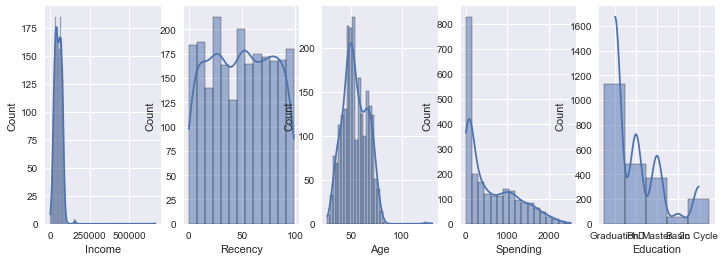

In [9]:
# displot
fig, ax = plt.subplots(1, 5, figsize=(12, 4))
sns.histplot(df['Income'], ax=ax[0], kde=True)
sns.histplot(df['Recency'], ax=ax[1], kde=True)
sns.histplot(df['Age'], ax=ax[2], kde=True)
sns.histplot(df['Spending'], ax=ax[3], kde=True)
sns.histplot(df['Education'], ax=ax[4], kde=True)

# Outliers

* IQR : (Q3 - Q1)
* Upper bound : Q3 + 1.5 * IQR
* Lower bound : Q1 - 1.5 * IQR

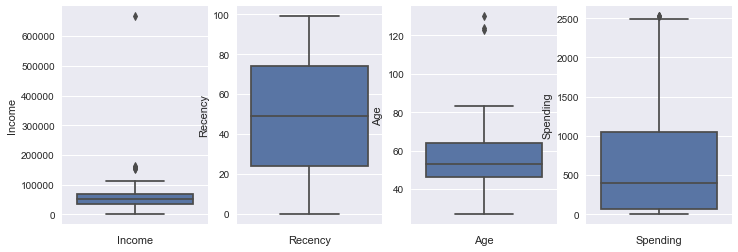

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4)) # Income, Recency, Age, Spending

contents = ['Income', 'Recency', 'Age', 'Spending']
for i in range(4):
    ax[i].set_xlabel(contents[i])
    sns.boxplot(y=contents[i], data=df, ax=ax[i])

In [11]:
for content in contents:
    print(content)
    print('{} --> '.format(df[content].shape), end='')
    
    # IQR
    Q1 = df[content].quantile(0.25)
    Q3 = df[content].quantile(0.75)
    IQR = Q3 - Q1
    
    # Outliers
    df[(df[content] < (Q1 - 1.5 * IQR)) | (df[content] > (Q3 + 1.5 * IQR))]
    df = df[(df[content] > (Q1 - 1.5 * IQR)) & (df[content] < (Q3 + 1.5 * IQR))]
    print('{}'.format(df[content].shape))

Income
(2240,) --> (2208,)
Recency
(2208,) --> (2208,)
Age
(2208,) --> (2205,)
Spending
(2205,) --> (2202,)


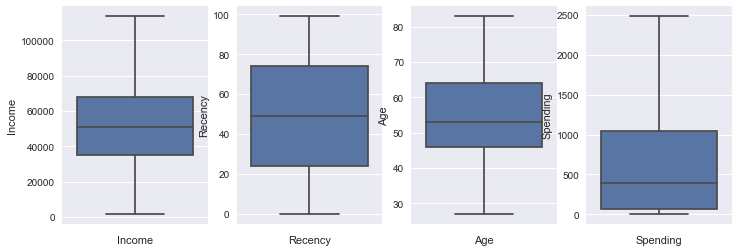

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4)) # Income, Recency, Age, Spending

contents = ['Income', 'Recency', 'Age', 'Spending']
for i in range(4):
    ax[i].set_xlabel(contents[i])
    sns.boxplot(y=contents[i], data=df, ax=ax[i])

# High Leverage

In [13]:
# check high leverage points
from statsmodels.graphics.regressionplots import *
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split

# X = df[['Income', 'Recency', 'Age', 'Children']]
# y = df['Spending']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = ols('Spending ~ Income + Recency + Age + Children', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     1486.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        14:15:10   Log-Likelihood:                -15760.
No. Observations:                2202   AIC:                         3.153e+04
Df Residuals:                    2197   BIC:                         3.156e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -306.8380     36.107     -8.498      0.0

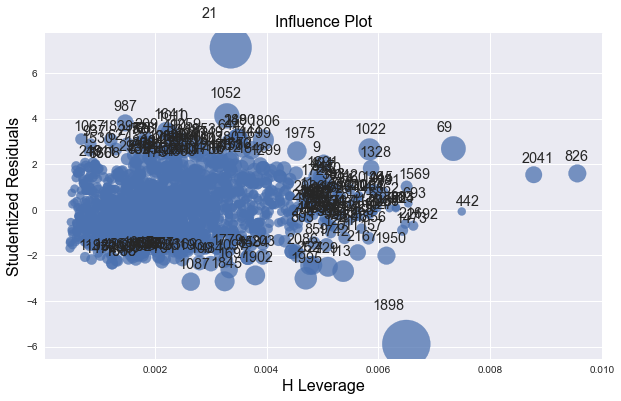

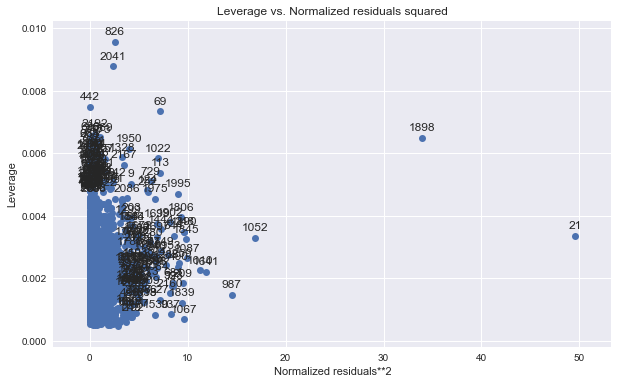

In [14]:
import statsmodels.api as sm

# influence plot
fig, ax = plt.subplots(figsize=(10, 6))
fig = sm.graphics.influence_plot(model1, ax=ax, criterion='cooks')

# leverage plot
fig, ax = plt.subplots(figsize=(10, 6))
fig = sm.graphics.plot_leverage_resid2(model1, ax=ax)

# Missing Value

* as we see above, there's missing value for the column 'Income'
* applying the mean value to fill the missing value

In [15]:
# missing value to mean
df['Income'] = df['Income'].fillna(df['Income'].mean())

df.isna().sum()

ID                0
Year_Birth        0
Education         0
Marital_Status    0
Income            0
                 ..
Z_Revenue         0
Response          0
Age               0
Spending          0
Children          0
Length: 32, dtype: int64

# Correlation

/var/folders/zs/rvz3b9gj4fl0_f4rlwvmt2p80000gn/T/ipykernel_10523/4118044466.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

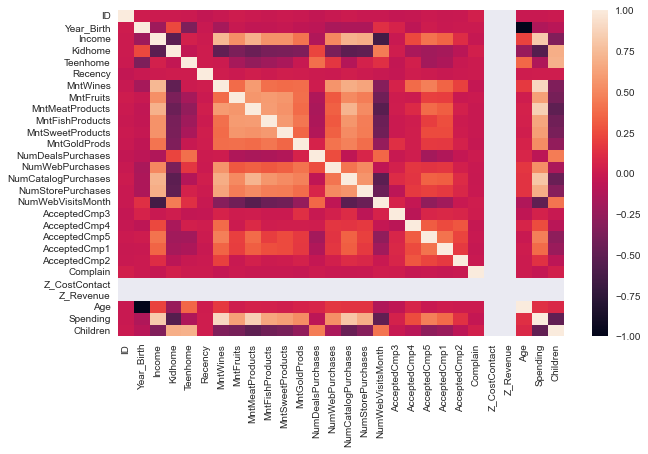

In [16]:
# correlation matrix
corr = df.corr()
corr

# heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=False, ax=ax)

In [31]:
# correlation value low 3
corr['Income'].sort_values(ascending=True)[0:4]

NumWebVisitsMonth                  -0.65
Kidhome                            -0.53
Children                           -0.35
Year_Birth                         -0.22
Name: Income, dtype: float64

# Export preprocessed dataset

In [18]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Children
0,5524,1957,Graduation,Single,"58,138.00",0,0,2012-09-04,58,635,...,0,0,0,0,3,11,Yes,66,1617,0
1,2174,1954,Graduation,Single,"46,344.00",1,1,2014-03-08,38,11,...,0,0,0,0,3,11,No,69,27,2
2,4141,1965,Graduation,Together,"71,613.00",0,0,2013-08-21,26,426,...,0,0,0,0,3,11,No,58,776,0
3,6182,1984,Graduation,Together,"26,646.00",1,0,2014-02-10,26,11,...,0,0,0,0,3,11,No,39,53,1
4,5324,1981,PhD,Married,"58,293.00",1,0,2014-01-19,94,173,...,0,0,0,0,3,11,No,42,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,"61,223.00",0,1,2013-06-13,46,709,...,0,0,0,0,3,11,No,56,1341,1
2236,4001,1946,PhD,Together,"64,014.00",2,1,2014-06-10,56,406,...,0,1,0,0,3,11,No,77,444,3
2237,7270,1981,Graduation,Divorced,"56,981.00",0,0,2014-01-25,91,908,...,0,0,0,0,3,11,No,42,1241,0
2238,8235,1956,Master,Together,"69,245.00",0,1,2014-01-24,8,428,...,0,0,0,0,3,11,No,67,843,1


In [19]:
df.to_csv('marketing_campaign_preprocessed.csv', index=False)